# k-Means Clustering

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## What does k-Means do?
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups (clusters) in the data, with the number of groups represented by the variable 'k'. The algorithm works iteratively to assign each data point to one of k groups based on the features that are provided. Data points are clustered based on how similar they are, usually based on some kind of distance measurement (Euclidian distance) in feature space.

Feature space just means that there are as many dimensions, as there are features. As a human it's easy to visualize 2D or 3D, but if we have 100 features, the points are in 100-D space, something too abstract for the human brain.
Still, the same mathematical formula can be applied to calculate the distance between 2 data points, in 2D or in 100D, it doesn't matter. Below you can see an image of Euclidean distance in 2D space (x,y). It's easy to see how you can apply the same calculations in 100 dimensions (x,y,z,a,b,c,...)

The results of the k-means clustering algorithm, that's based on that simularity measurement, are:
*   The centroids of the k clusters, which can be used to label new data. A centroid is a 'cluster center': the arithmetic mean of all the points belonging to the cluster, the 'middle' in feature space
*   Labels for the training data (each data point is assigned to a single cluster)




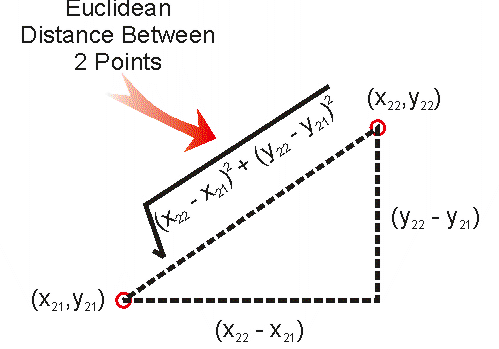

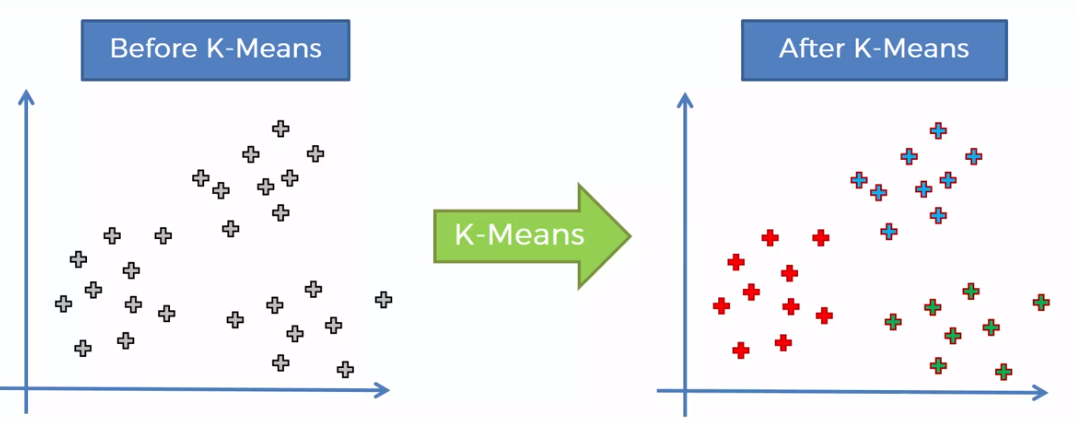

## k-Means Algorithm

The k-means algorithm has a couple of hyperparameters that we need to set, before modeling/training. These hyperparameters will highly effect how good our clustering will be.

It begins with choosing the number of clusters, k. Sometimes the k is evident, or clearly visible from the dataset when visualized, however most of the times this is not the case.

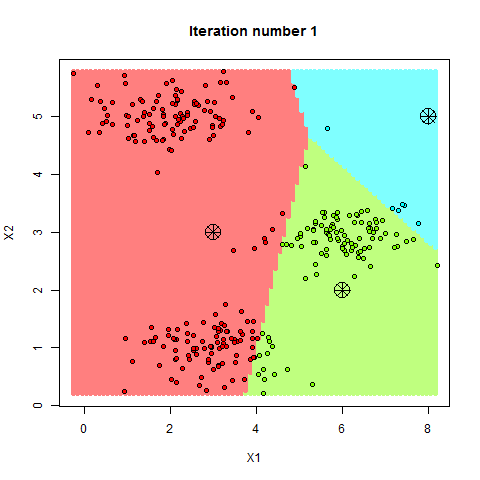

## Introducing k-Means in code

First, let's generate a two-dimensional dataset containing four distinct blobs.
To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

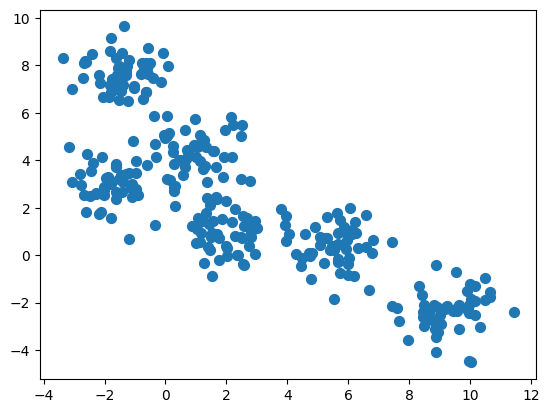

In [20]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=6,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters.
The *k*-means algorithm does this automatically, and as usual, Scikit-Learn uses the typical estimator API when we work with data, i.e. we can use: fit, predict, etc. More info: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [21]:
from sklearn.cluster import KMeans

# Create a KMeans object with 4 clusters, and n_init of 10
# The n_init value is a parameter of the k-means algorithm that controls how many times the algorithm is run with different random initial centroids. The best result, according to inertia, is chosen

kmeans = KMeans(n_clusters=6, n_init=25, random_state=1)

# Fit the data and learn the model
kmeans.fit(X)

# Predict the cluster labels for new data
y_pred = kmeans.predict(X)

# Score the clustering quality
score = kmeans.score(X)

# Print the results
print("Cluster centers:", kmeans.cluster_centers_)
print("Cluster labels:", kmeans.labels_)
print("Inertia (how good is the clustering):", kmeans.inertia_)

Cluster centers: [[ 0.98062235  4.29172731]
 [ 9.31609098 -2.3582019 ]
 [ 1.96289862  0.97340371]
 [-1.3967246   7.6326279 ]
 [ 5.52901456  0.41781617]
 [-1.7713324   2.97850452]]
Cluster labels: [5 4 1 1 2 5 1 0 5 1 4 4 0 3 5 0 0 4 2 3 4 3 0 1 3 0 5 2 3 3 5 4 5 4 2 1 2
 1 3 2 0 3 0 2 4 4 4 5 5 5 1 3 5 3 4 5 3 5 4 3 4 2 2 3 1 4 1 4 3 5 5 3 2 3
 4 1 2 1 3 0 4 1 5 0 4 4 3 2 4 2 2 4 4 2 2 4 4 4 4 2 0 1 4 0 5 5 2 3 5 0 3
 2 2 3 0 3 1 2 2 2 0 1 3 2 2 1 5 3 3 5 5 5 5 3 5 1 1 1 3 5 2 4 1 3 4 0 4 4
 1 0 1 0 3 1 0 4 1 3 0 4 0 5 1 4 1 0 0 1 0 3 5 2 3 1 0 2 2 0 4 5 0 1 3 2 5
 0 3 2 0 3 1 4 0 0 0 5 4 3 0 4 0 2 3 3 1 2 3 0 2 1 5 1 0 4 3 1 2 4 2 3 0 0
 1 3 3 5 5 0 4 5 2 3 5 3 0 1 1 2 0 4 0 5 3 0 1 5 1 4 1 2 0 5 4 4 1 4 3 2 0
 2 3 1 2 5 4 0 0 1 2 1 1 0 1 2 5 5 3 3 0 2 2 2 2 4 1 5 2 0 5 5 5 1 3 4 2 5
 5 4 4 1]
Inertia (how good is the clustering): 371.6767581366942


Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

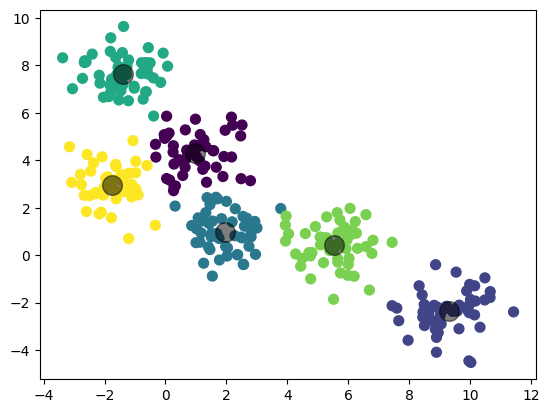

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach (known as *expectation–maximization*).

## k-Means Algorithm:

1. Guess some cluster centers
2. Repeat until converged
   1. assign points to the nearest cluster center
   2. set the cluster centers to the mean

#### The number of clusters must be selected beforehand
Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data (however we can get a crude estimate, using the elbow method - see below).
For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters:

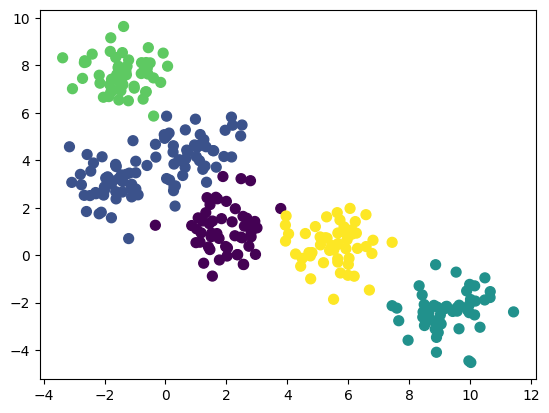

In [24]:
labels = KMeans(5, n_init=10, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Inertia

Inertia is a measure of how well the k-means algorithm clusters the data. It is the sum of the squared distances of each point to its closest cluster center

The lower the inertia, the more compact and homogeneous the clusters are. The k-means algorithm tries to minimize the inertia by finding the best cluster centers for a given number of clusters. However, the inertia is a very simple and not such a good indicator of the quality of the clustering, because it depends on the number of clusters, the scale of the data, and the initialization of the cluster centers. But it will do for this general introduction into clustering.

### Elbow method
One way to choose the optimal number of clusters, is to use the elbow method, which plots the inertia against the number of clusters and looks for a point where the inertia decreases sharply. This point indicates that adding more clusters does not improve the clustering significantly. However, the elbow method is not always reliable, because the inertia curve may not have a clear elbow, or there may be multiple elbows.

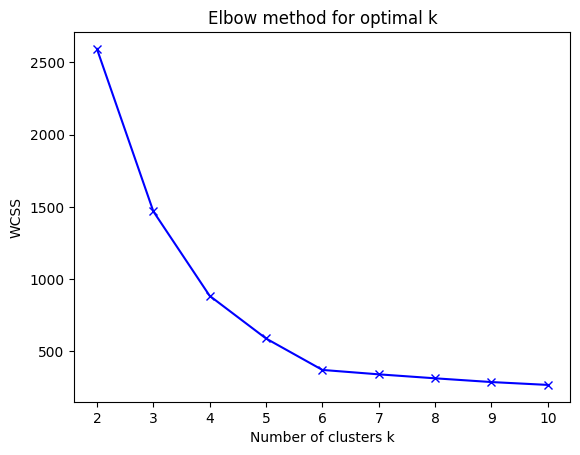

In [23]:
# Apply the kmeans algorithm for k in the range 2 to 10
wcss = [] # Within-cluster sum of squares, or inertia, is a measure of how good the clusering is
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), wcss, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.title('Elbow method for optimal k')
plt.show()

As we can see in the figure above, a good estimate for the number of clusters for this data, is indeed 4.